In [71]:
import yfinance as yf
import pandas as pd

# Lista de tickers de las acciones a consultar
tickers = [
    "LYB", "AXP", "VZ", "AVGO", "BA", "ABBV", "CAT", "JPM", "CVX", "KO", 'SPY'
]

# Fecha de inicio y fin para los datos
start_date = "2019-05-12"
end_date = "2024-05-12"

# Descargar datos de precios mensuales
data = yf.download(tickers, start=start_date, end=end_date, interval="1d")

# Mostrar los primeros registros para revisar
print(data.head())


[*********             18%%                      ]  2 of 11 completed

[*********************100%%**********************]  11 of 11 completed

Price       Adj Close                                                  \
Ticker           ABBV        AVGO         AXP          BA         CAT   
Date                                                                    
2019-05-13  61.261105  249.723099  108.052376  331.361084  111.397064   
2019-05-14  62.512302  257.060394  109.087212  336.930115  113.326286   
2019-05-15  62.783272  259.077667  109.693184  339.483795  113.175171   
2019-05-16  63.357067  253.051208  111.725571  347.508270  112.561729   
2019-05-17  63.325191  246.752457  111.007721  348.696686  109.138916   

Price                                                               ...  \
Ticker            CVX        JPM         KO        LYB         SPY  ...   
Date                                                                ...   
2019-05-13  95.612152  94.400795  41.135315  59.310123  259.165955  ...   
2019-05-14  96.564781  95.151176  41.683208  59.770348  261.509705  ...   
2019-05-15  96.961716  94.788933  42.102

In [72]:
prices = data['Adj Close'].resample('D').last()

In [73]:
prices.shape

(1825, 11)

In [74]:
returns = data['Adj Close'].pct_change()

In [75]:
returns.shape

(1259, 11)

In [76]:
returns.head()

Ticker,ABBV,AVGO,AXP,BA,CAT,CVX,JPM,KO,LYB,SPY,VZ
Date,,,,,,,,,,,
2019-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-14,0.020424,0.029382,0.009577,0.016807,0.017318,0.009963,0.007949,0.013319,0.007760,0.009043,-0.003524
2019-05-15,0.004335,0.007847,0.005555,0.007579,-0.001333,0.004111,-0.003807,0.010064,0.002732,0.005858,0.004598
2019-05-16,0.009139,-0.023261,0.018528,0.023637,-0.005420,-0.001240,0.012830,0.008133,0.013129,0.009261,0.010034
2019-05-17,-0.000503,-0.024891,-0.006425,0.003420,-0.030408,-0.002318,-0.004851,-0.007664,-0.020171,-0.006465,0.012373


In [77]:
df = pd.read_excel('diarios.xlsx')

In [78]:
df.head()

,Unnamed: 0,LYB UN Equity,AXP UN Equity,VZ UN Equity,AVGO UW Equity,BA UN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,ABBV UN Equity,CMG US Equity,TSLA US Equity,NVDA US Equity
0,Date,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average
1,2019-05-13 00:00:00,0,-0.0498,-0.0149,0.0325,-0.0566,-0.1278,0.0982,0.0557,-0.0074,0.0494,-0.0144,-0.0087,-0.0364
2,2019-05-14 00:00:00,-0.0384,0,-0.0182,0.1987,-0.0543,-0.1077,-0.0246,0.0803,0.0194,-0.0171,-0.0233,-0.0255,-0.025
3,2019-05-15 00:00:00,0.0521,-0.0077,0.0029,0.0708,-0.0243,-0.0749,0.026,0.0298,0.1013,0.0166,0.0422,-0.0151,0.0188
4,2019-05-16 00:00:00,0.1392,0.0022,0.012,-0.0347,-0.0183,-0.0354,-0.1119,0.0755,-0.0033,-0.0087,0.0524,-0.0124,0.0184


In [79]:
tickers = ["LYB UN Equity", "AXP UN Equity", "VZ UN Equity", "AVGO UW Equity", "BA UN Equity",
           "ABBV UN Equity", "CAT UN Equity", "JPM UN Equity", "CVX UN Equity", "KO UN Equity",'TSLA US Equity', 'NVDA US Equity']

In [80]:
organized_data = pd.DataFrame()

# Pre procesamiento de datos

In [81]:
# revisando datos faltantes
df.isnull().sum()
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

In [82]:

# se agraga una nueva columna y cuenta y imprime el porcentaje de datos
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent


In [83]:
# revisando datos faltantes
prices.isnull().sum()
miss_val = prices.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=prices.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

In [84]:
prices.shape

(1825, 11)

In [85]:

# se agraga una nueva columna y cuenta y imprime el porcentaje de datos
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
Ticker,,
ABBV,566,43.34
AVGO,566,43.34
AXP,566,43.34
BA,566,43.34
CAT,566,43.34
CVX,566,43.34
JPM,566,43.34
KO,566,43.34
LYB,566,43.34


En este caso, los datos nulos equivalen a días no bursatiles, se eliminarán teniendo en cuenta que en estos días no hay fluctuaciones en el mercado

In [86]:
prices = prices.dropna()

In [87]:
prices.shape

(1259, 11)

In [88]:
returns.head()

Ticker,ABBV,AVGO,AXP,BA,CAT,CVX,JPM,KO,LYB,SPY,VZ
Date,,,,,,,,,,,
2019-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-14,0.020424,0.029382,0.009577,0.016807,0.017318,0.009963,0.007949,0.013319,0.007760,0.009043,-0.003524
2019-05-15,0.004335,0.007847,0.005555,0.007579,-0.001333,0.004111,-0.003807,0.010064,0.002732,0.005858,0.004598
2019-05-16,0.009139,-0.023261,0.018528,0.023637,-0.005420,-0.001240,0.012830,0.008133,0.013129,0.009261,0.010034
2019-05-17,-0.000503,-0.024891,-0.006425,0.003420,-0.030408,-0.002318,-0.004851,-0.007664,-0.020171,-0.006465,0.012373


In [89]:
returns = returns.dropna()

In [90]:
returns.to_csv('returns.csv', index=True)
prices.to_csv('prices.csv', index = True)

revisión de outliers

In [91]:
import numpy as np

# Creando una copia de los datos para manipular sin afectar el original
returns_filtered = returns.copy()

for ticker in returns.columns:
    Q1 = returns[ticker].quantile(0.25)
    Q3 = returns[ticker].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrando los outliers y opcionalmente puedes reemplazarlos con NaN
    returns_filtered[ticker] = returns[ticker].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)


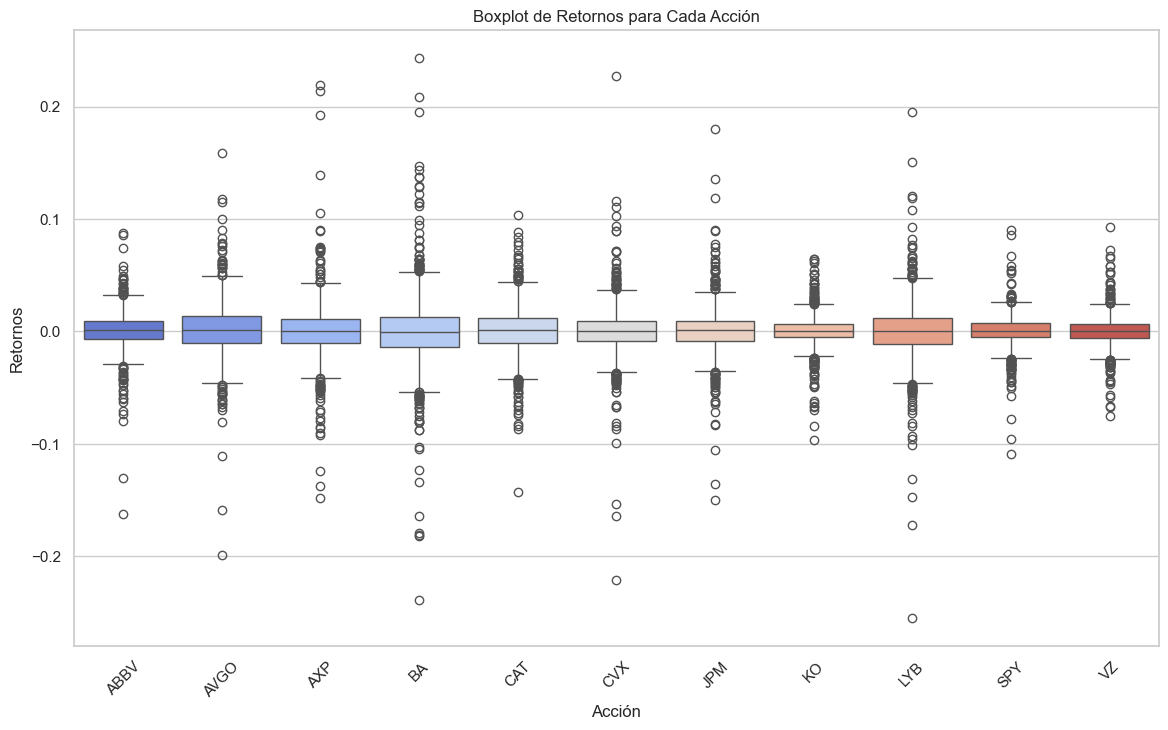

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el tamaño del gráfico y el estilo si deseas
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Crea un boxplot
sns.boxplot(data=returns, palette="coolwarm")
plt.title('Boxplot de Retornos para Cada Acción')
plt.xlabel('Acción')
plt.ylabel('Retornos')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visualización
plt.show()

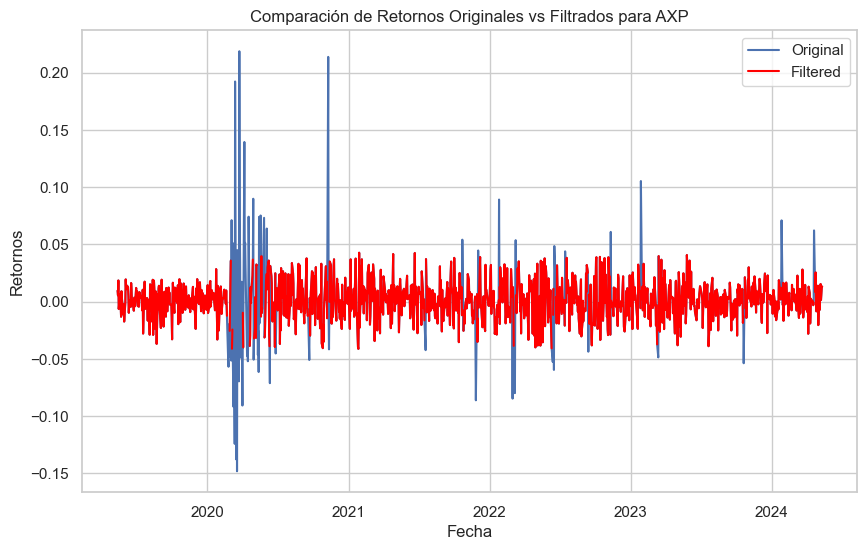

In [93]:
import matplotlib.pyplot as plt

# Visualizando los retornos filtrados para un ticker específico, por ejemplo, AVGO
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns['AXP'], label='Original')
plt.plot(returns_filtered.index, returns_filtered['AXP'], label='Filtered', color='red')
plt.title('Comparación de Retornos Originales vs Filtrados para AXP')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.legend()
plt.show()

# Teniendo en cuenta que contamos con datos muy completos, vamos a hacer el análisis descriptivo y exploratorio

In [94]:
# Suponiendo que 'returns' es tu DataFrame de retornos
summary_stats = returns.describe()
print(summary_stats)

Ticker         ABBV         AVGO          AXP           BA          CAT  \
count   1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean       0.000895     0.001610     0.000924     0.000016     0.001128   
std        0.015852     0.023532     0.023956     0.031863     0.020325   
min       -0.162524    -0.199129    -0.148187    -0.238484    -0.142822   
25%       -0.006767    -0.010599    -0.009929    -0.013705    -0.009837   
50%        0.001247     0.001421     0.000759    -0.000422     0.001114   
75%        0.008884     0.013750     0.011199     0.012979     0.011828   
max        0.087174     0.158337     0.218823     0.243186     0.103321   

Ticker          CVX          JPM           KO          LYB          SPY  \
count   1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean       0.000681     0.000792     0.000430     0.000757     0.000642   
std        0.022305     0.020052     0.013217     0.025523     0.013187   
min       -0.221248    -

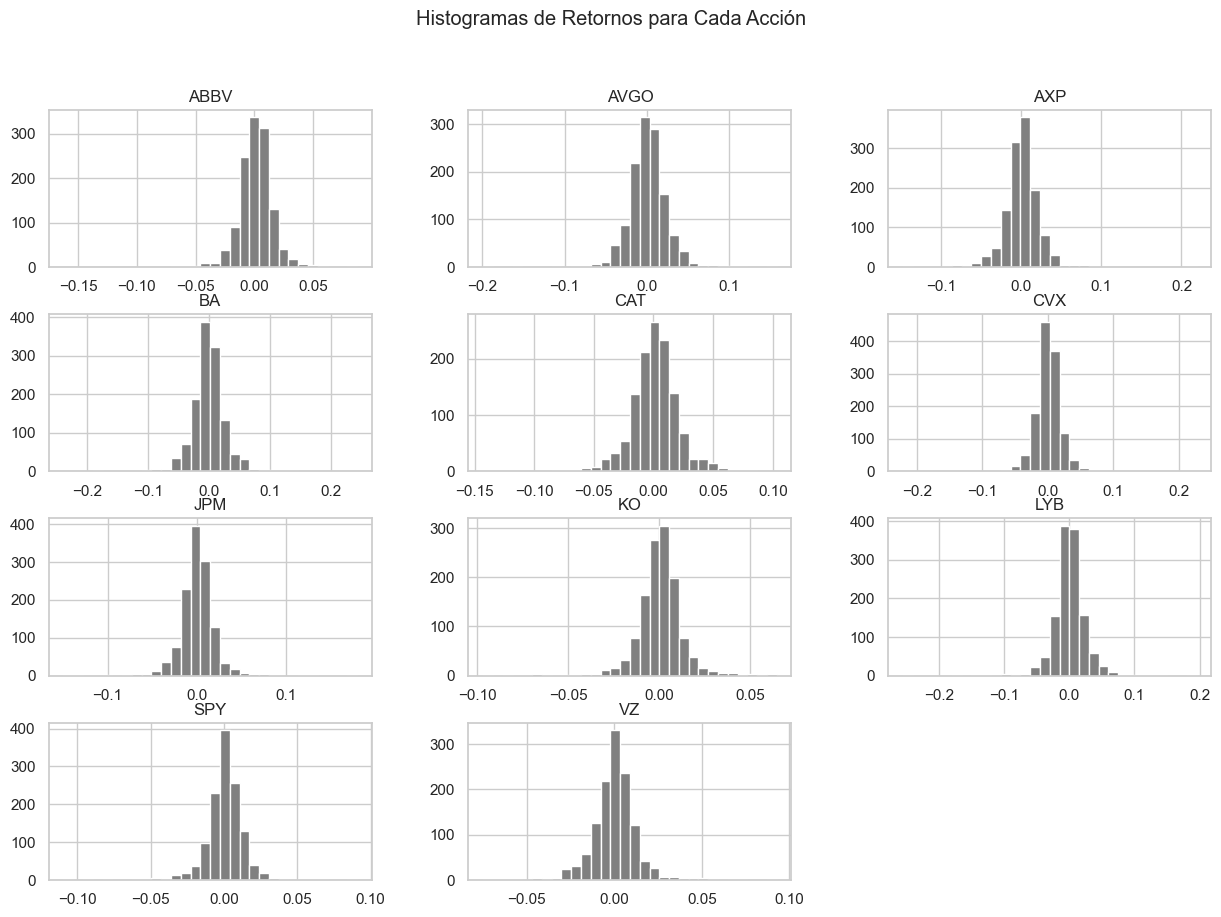

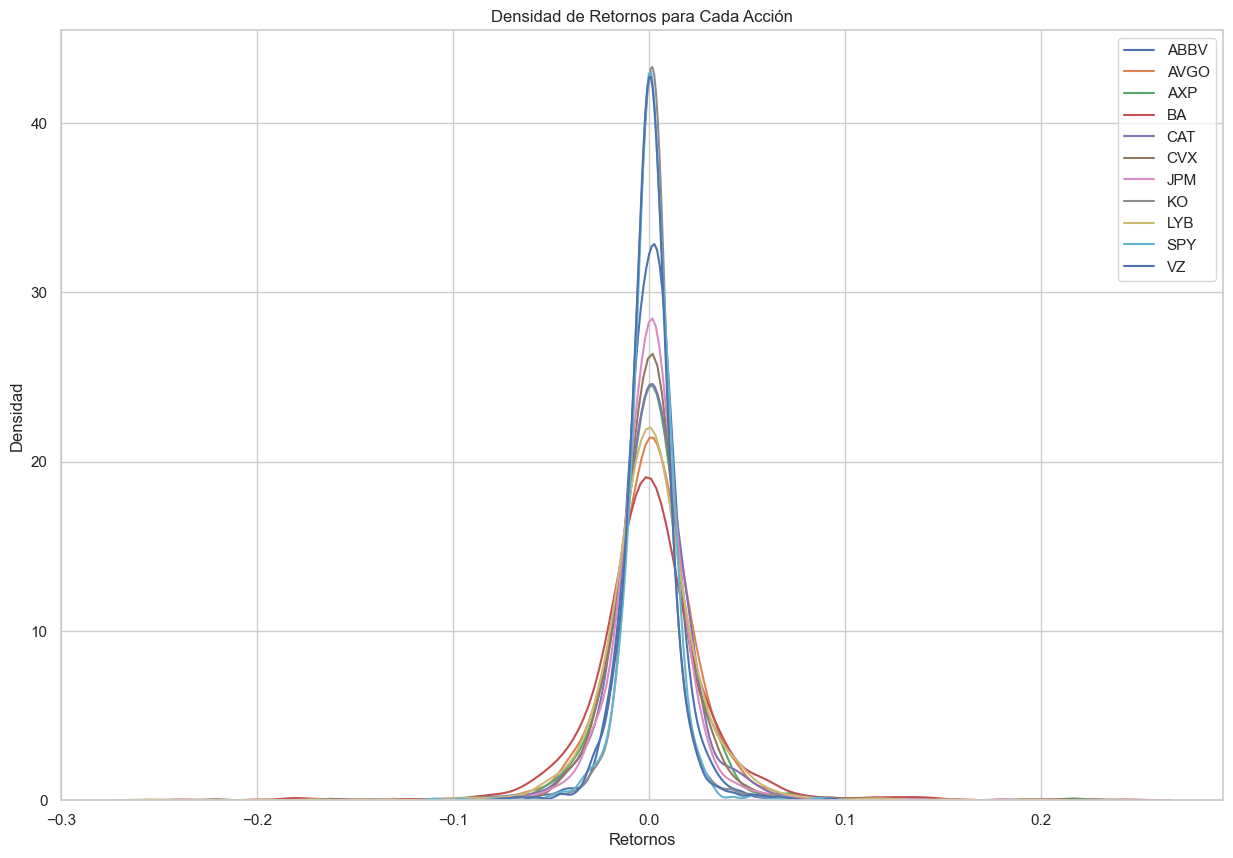

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo
sns.set(style="whitegrid")

# Crear histogramas para cada acción
returns.hist(bins=30, figsize=(15, 10), color='gray')
plt.suptitle('Histogramas de Retornos para Cada Acción')
plt.show()

# Gráficos de densidad
plt.figure(figsize=(15, 10))
for column in returns.columns:
    sns.kdeplot(returns[column], label=column)
plt.title('Densidad de Retornos para Cada Acción')
plt.xlabel('Retornos')
plt.ylabel('Densidad')
plt.legend()
plt.show()

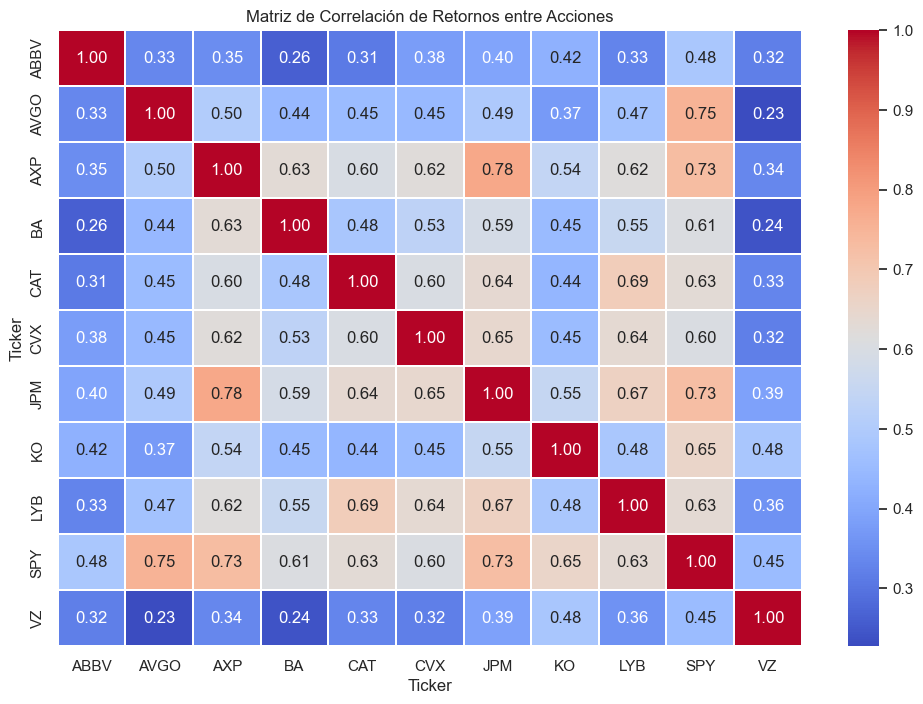

In [96]:
# Calculando la matriz de correlación
correlation_matrix = returns.corr()

# Visualizando la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Matriz de Correlación de Retornos entre Acciones')
plt.show()

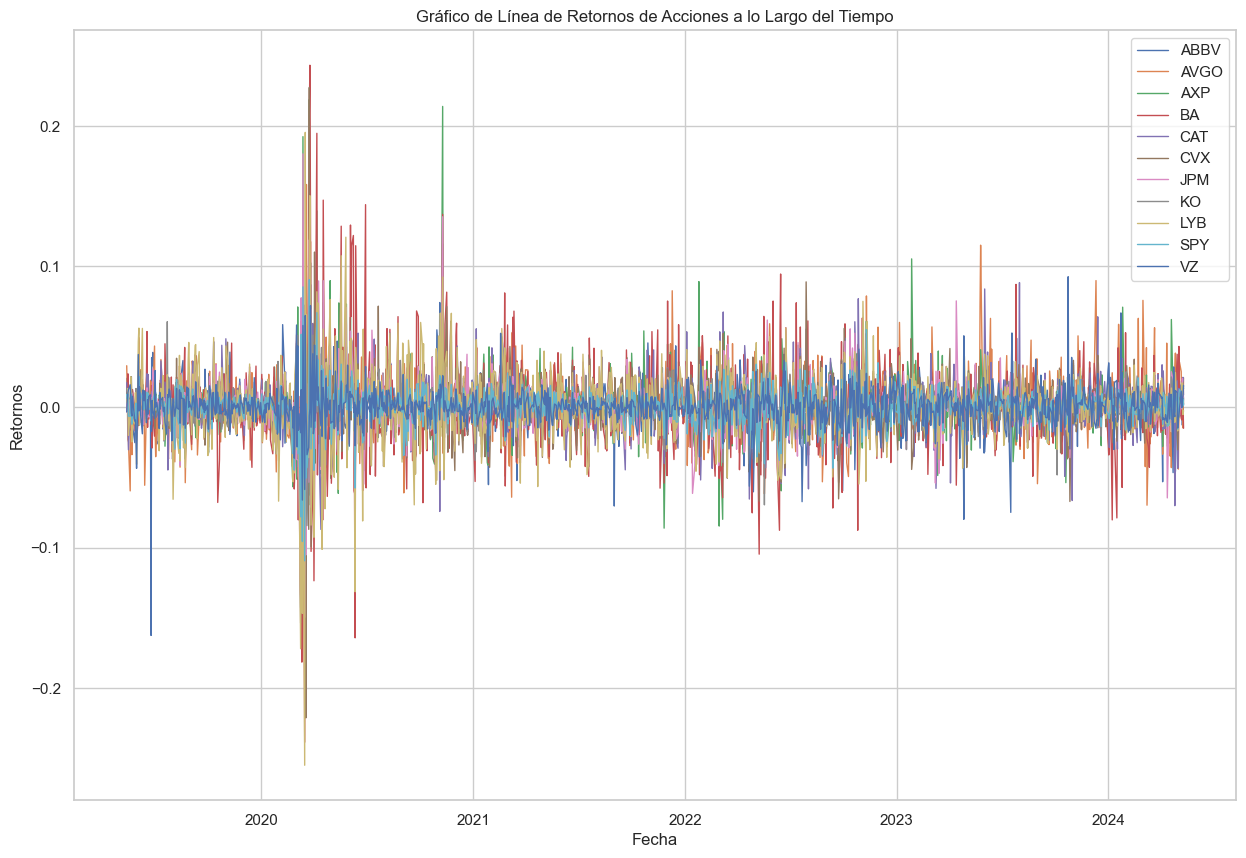

In [97]:
plt.figure(figsize=(15, 10))
for column in returns.columns:
    plt.plot(returns.index, returns[column], label=column, linewidth=1)
plt.title('Gráfico de Línea de Retornos de Acciones a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.legend()
plt.show()

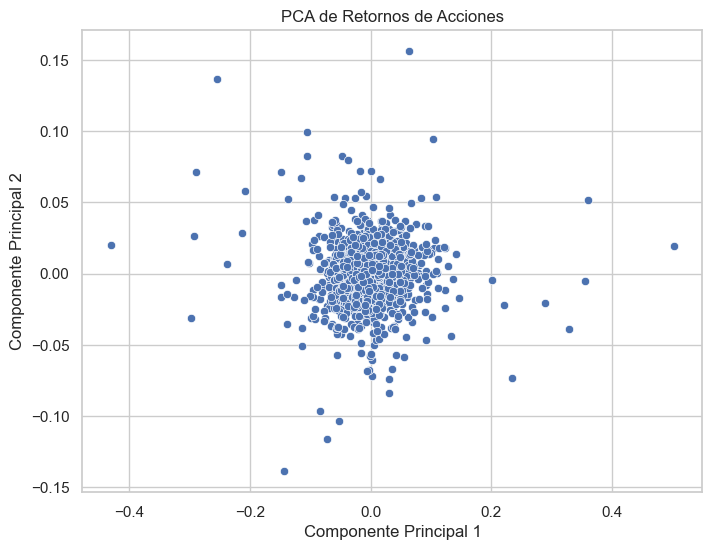

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(returns.fillna(0))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Gráfico de dispersión de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df)
plt.title('PCA de Retornos de Acciones')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# INCLUSIÓN VARIABLES EXTERNAS AL SP500

In [99]:
import yfinance as yf
import pandas as pd

# Lista de tickers de las acciones a consultar
tickers = [
    "LYB", "AXP", "VZ", "AVGO", "BA", "ABBV", "CAT", "JPM", "CVX", "KO", 'SPY', "TSLA", "CMG", 'NVDA'
]

# Fecha de inicio y fin para los datos
start_date = "2019-05-12"
end_date = "2024-05-12"

# Descargar datos de precios mensuales
data2 = yf.download(tickers, start=start_date, end=end_date, interval="1d")

# Mostrar los primeros registros para revisar
print(data2.head())

[*********************100%%**********************]  14 of 14 completed

Price       Adj Close                                                  \
Ticker           ABBV        AVGO         AXP          BA         CAT   
Date                                                                    
2019-05-13  61.261105  249.723099  108.052376  331.361084  111.397064   
2019-05-14  62.512302  257.060394  109.087212  336.930115  113.326286   
2019-05-15  62.783272  259.077667  109.693184  339.483795  113.175171   
2019-05-16  63.357067  253.051208  111.725571  347.508270  112.561729   
2019-05-17  63.325191  246.752457  111.007721  348.696686  109.138916   

Price                                                               ...  \
Ticker             CMG        CVX        JPM         KO        LYB  ...   
Date                                                                ...   
2019-05-13  687.270020  95.612152  94.400795  41.135315  59.310123  ...   
2019-05-14  703.179993  96.564781  95.151176  41.683208  59.770348  ...   
2019-05-15  705.890015  96.961716  94.78

In [100]:
data2.shape

(1259, 84)

In [101]:
prices_ext = data2['Adj Close'].resample('D').last()

In [102]:
returns_ext = prices_ext.pct_change()

/var/folders/_y/12sgjd4s7rg6nd87yc840f480000gn/T/ipykernel_61932/2207417586.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_ext = prices_ext.pct_change()


In [103]:
returns_ext.shape

(1825, 14)

In [104]:
returns_ext.describe()

Ticker,ABBV,AVGO,AXP,BA,CAT,CMG,CVX,JPM,KO,LYB,NVDA,SPY,TSLA,VZ
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,0.000617,0.001111,0.000638,0.000011,0.000778,0.001017,0.000469,0.000547,0.000297,0.000522,0.002086,0.000443,0.001902,0.000018
std,0.013169,0.019555,0.019897,0.026458,0.016886,0.018369,0.018524,0.016654,0.010977,0.021196,0.027305,0.010955,0.034120,0.010900
min,-0.162524,-0.199129,-0.148187,-0.238484,-0.142822,-0.112889,-0.221248,-0.149649,-0.096725,-0.254910,-0.184521,-0.109424,-0.210628,-0.074978
25%,-0.003066,-0.004306,-0.004204,-0.007077,-0.004157,-0.004370,-0.004101,-0.003739,-0.002296,-0.005243,-0.007280,-0.001824,-0.007667,-0.002614
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.005342,0.007420,0.005935,0.005949,0.006885,0.006837,0.005717,0.005367,0.003727,0.006466,0.011153,0.003882,0.012466,0.003246
max,0.087174,0.158337,0.218823,0.243186,0.103321,0.152490,0.227407,0.180125,0.064796,0.195416,0.243696,0.090603,0.198949,0.092705


In [105]:
# revisando datos faltantes
prices_ext.isnull().sum()
miss_val = prices_ext.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=prices_ext.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

In [106]:
prices_ext = prices_ext.dropna()

In [107]:
returns_ext = returns_ext.dropna()

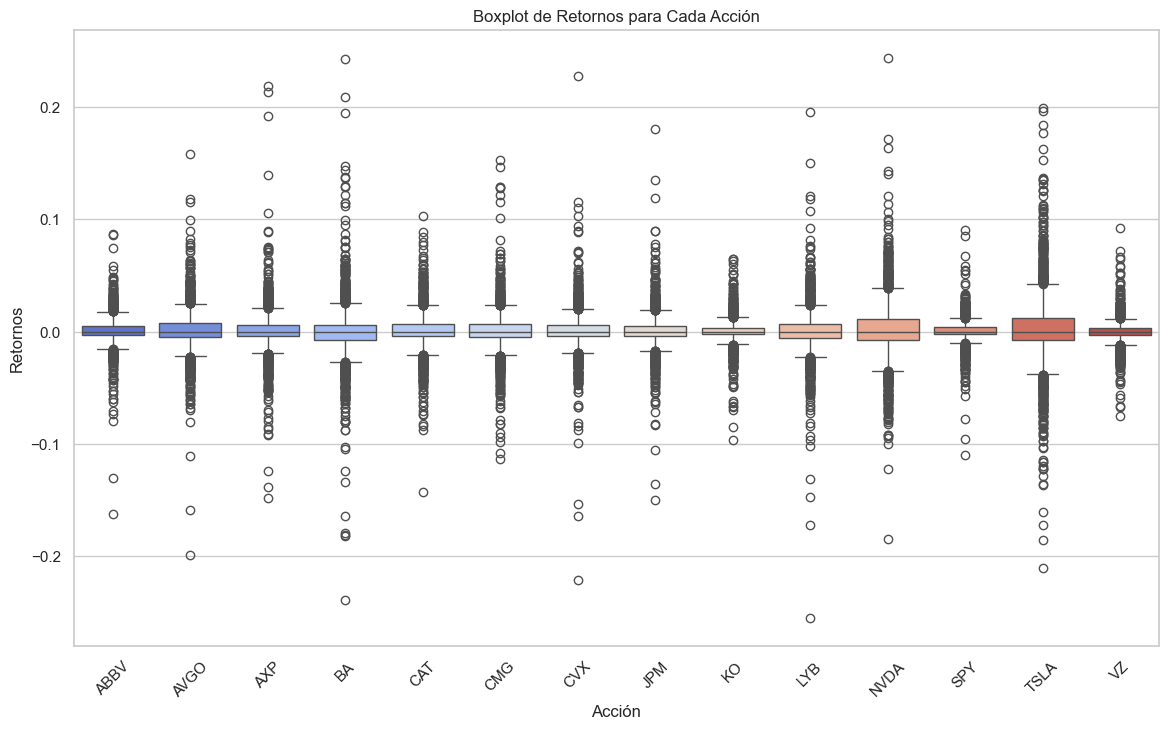

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el tamaño del gráfico y el estilo si deseas
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Crea un boxplot
sns.boxplot(data=returns_ext, palette="coolwarm")
plt.title('Boxplot de Retornos para Cada Acción')
plt.xlabel('Acción')
plt.ylabel('Retornos')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visualización
plt.show()

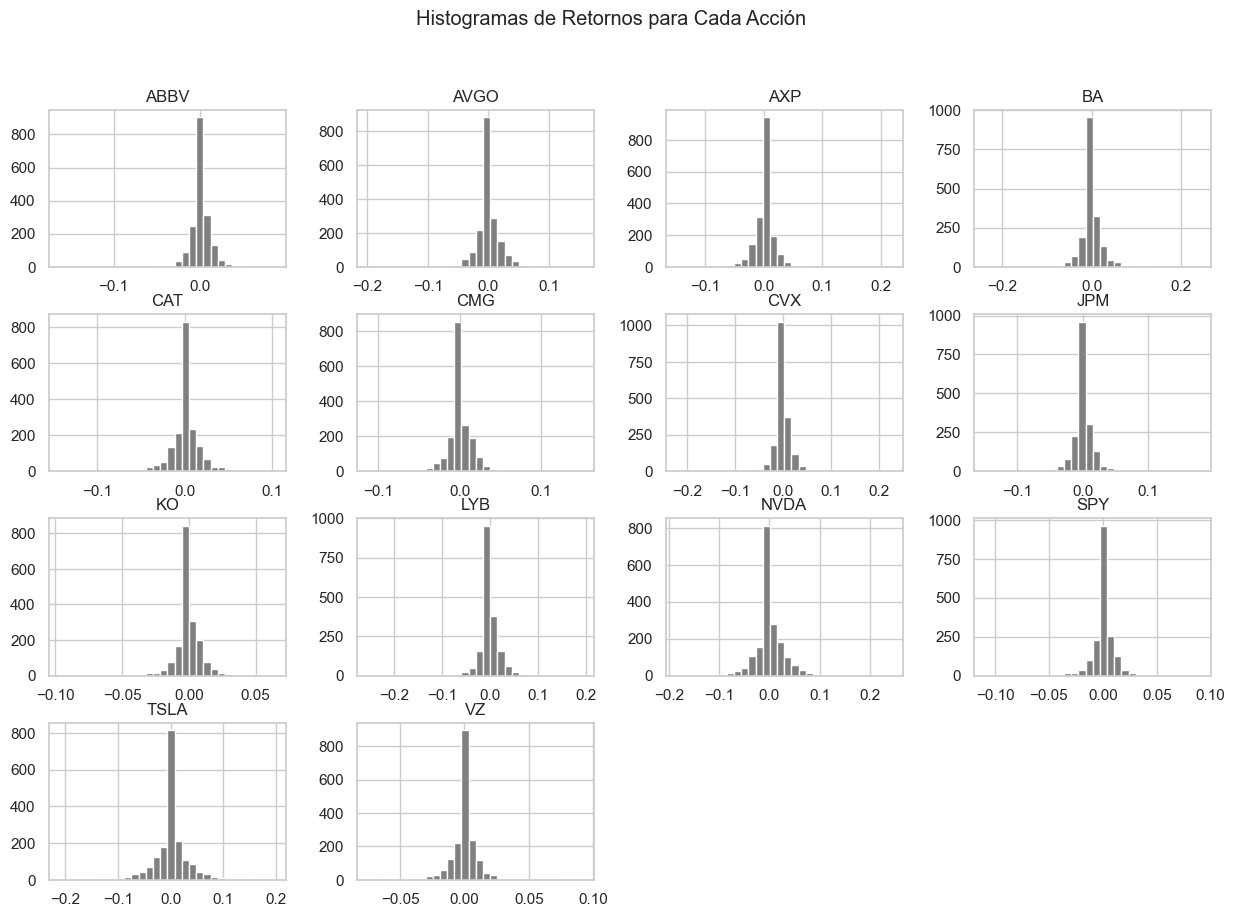

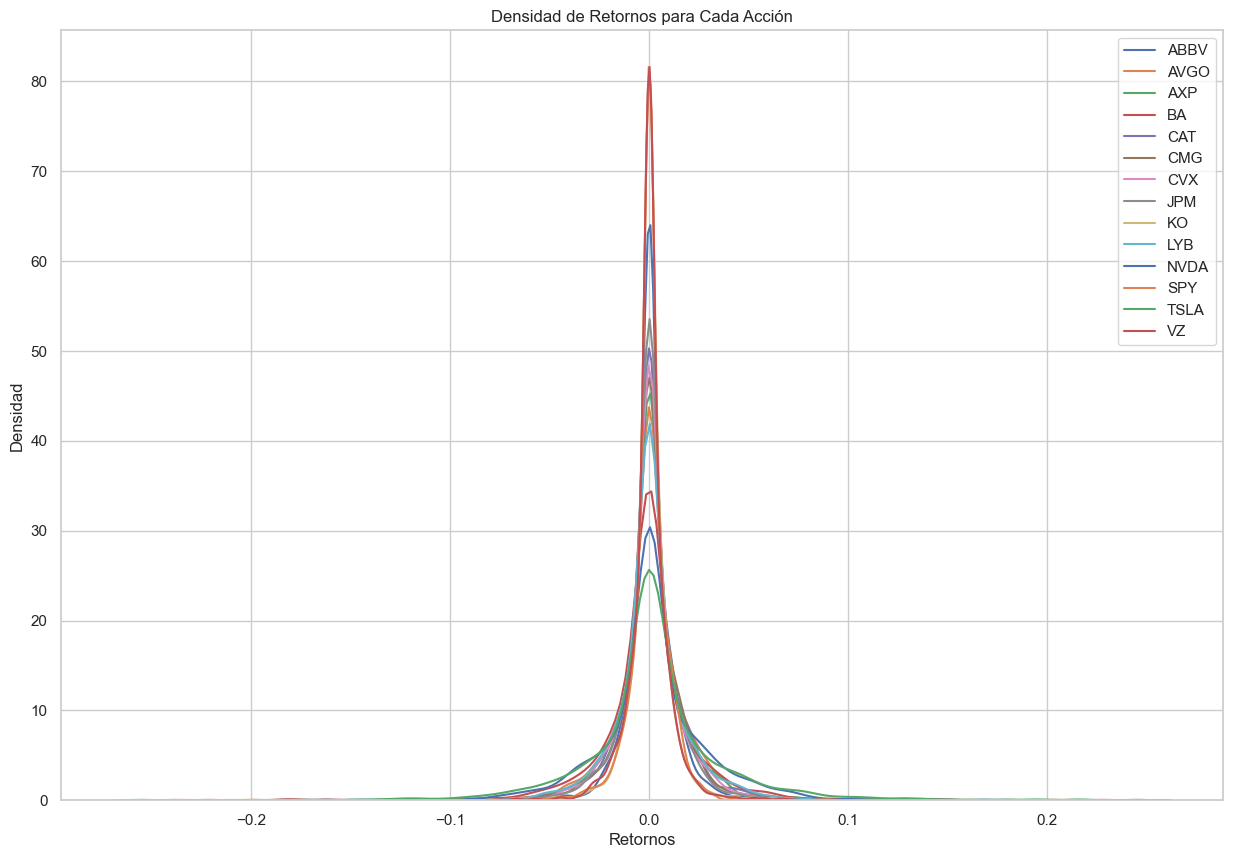

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo
sns.set(style="whitegrid")

# Crear histogramas para cada acción
returns_ext.hist(bins=30, figsize=(15, 10), color='gray')
plt.suptitle('Histogramas de Retornos para Cada Acción')
plt.show()

# Gráficos de densidad
plt.figure(figsize=(15, 10))
for column in returns_ext.columns:
    sns.kdeplot(returns_ext[column], label=column)
plt.title('Densidad de Retornos para Cada Acción')
plt.xlabel('Retornos')
plt.ylabel('Densidad')
plt.legend()
plt.show()

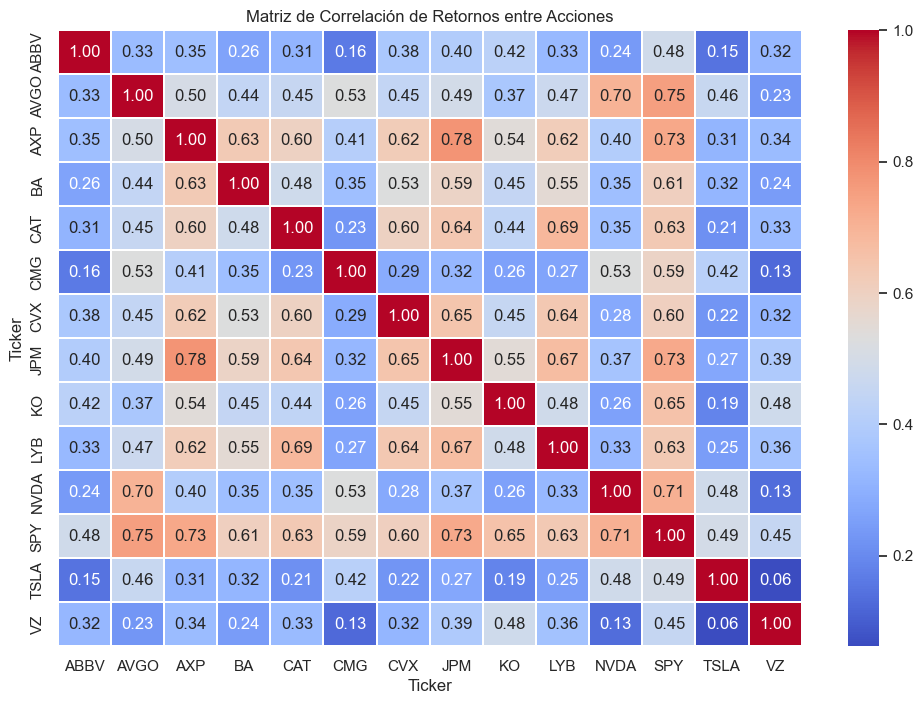

In [110]:
# Calculando la matriz de correlación
correlation_matrix_ext = returns_ext.corr()

# Visualizando la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_ext, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Matriz de Correlación de Retornos entre Acciones')
plt.show()

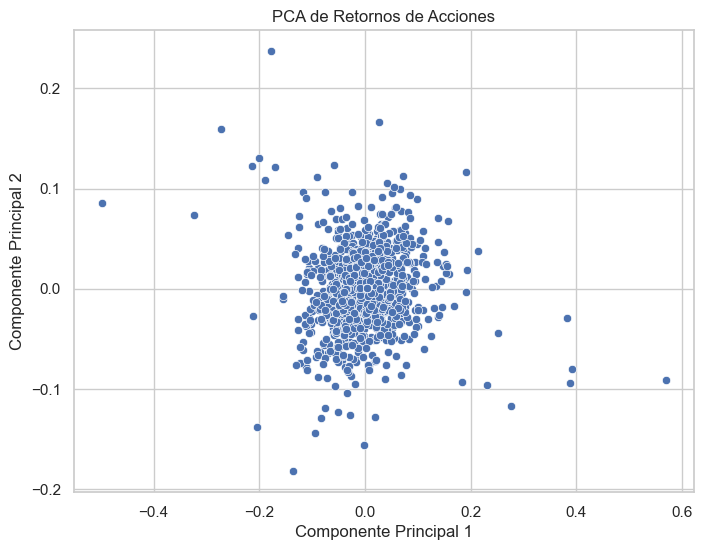

In [114]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(returns_ext.fillna(0))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Gráfico de dispersión de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df)
plt.title('PCA de Retornos de Acciones')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

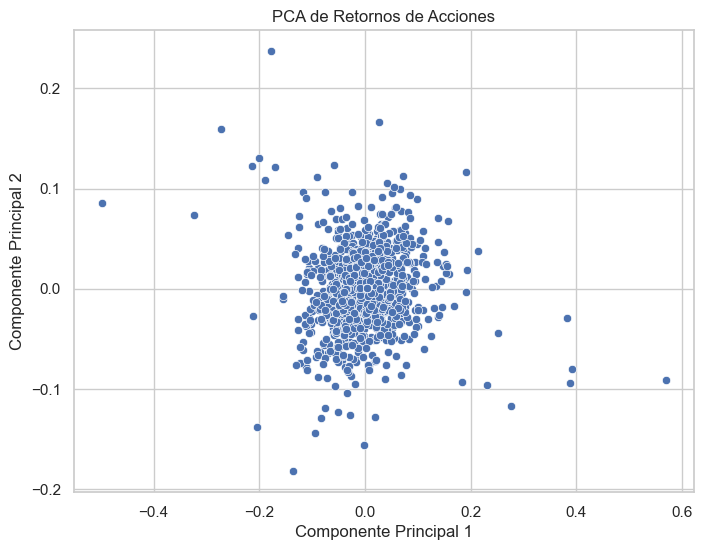

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(returns_ext.fillna(0))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df)
plt.title('PCA de Retornos de Acciones')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [112]:
returns_ext.head()

Ticker,ABBV,AVGO,AXP,BA,CAT,CMG,CVX,JPM,KO,LYB,NVDA,SPY,TSLA,VZ
Date,,,,,,,,,,,,,,
2019-05-14,0.020424,0.029382,0.009577,0.016807,0.017318,0.023150,0.009963,0.007949,0.013319,0.007760,0.022657,0.009043,0.023347,-0.003524
2019-05-15,0.004335,0.007847,0.005555,0.007579,-0.001333,0.003854,0.004111,-0.003807,0.010064,0.002732,-0.015182,0.005858,-0.001550,0.004598
2019-05-16,0.009139,-0.023261,0.018528,0.023637,-0.005420,0.004307,-0.001240,0.012830,0.008133,0.013129,0.003823,0.009261,-0.015607,0.010034
2019-05-17,-0.000503,-0.024891,-0.006425,0.003420,-0.030408,0.009846,-0.002318,-0.004851,-0.007664,-0.020171,-0.022848,-0.006465,-0.075767,0.012373
2019-05-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [113]:
returns_ext.to_csv('returns.csv', index=True)